## Bir Resim Sınıflandırma Projesi: Bir tıbbi görüntü kümesi üzerinde basit sınıflandırma modeli geliştirme. 

In [1]:
#https://medmnist.com
from medmnist import BreastMNIST
from torchvision import transforms

# Veri setini yüklüyoruz 
train_dataset = BreastMNIST(split='train', transform=transforms.ToTensor(), download=True)
test_dataset = BreastMNIST(split='test', transform=transforms.ToTensor(), download=True)
validation_dataset=BreastMNIST(split="val",transform=transforms.ToTensor(),download=True)

In [2]:
import tensorflow as tf


## VERİLERİ TENSORE DÖNÜŞTÜRÜYORUZ ÇÜNKÜ VERİ PYTORCH FORMATINA ÖZEL GELİYOR BreastMNIST'tan
# Train verilerini dönüştürüyoruz
train_images = tf.convert_to_tensor(train_dataset.imgs, dtype=tf.float32) / 255.0  # Normalize
train_labels = tf.convert_to_tensor(train_dataset.labels, dtype=tf.int32)

# Test verilerini dönüştürüyoruz
test_images = tf.convert_to_tensor(test_dataset.imgs, dtype=tf.float32) / 255.0  # Normalize
test_labels = tf.convert_to_tensor(test_dataset.labels, dtype=tf.int32)

# Test verilerini dönüştürüyoruz
validation_images = tf.convert_to_tensor(validation_dataset.imgs, dtype=tf.float32) / 255.0  # Normalize
validation_labels = tf.convert_to_tensor(validation_dataset.labels, dtype=tf.int32)

# Shape bilgilerini kontrol ediyoruz
print(f"Train Tensor Shape: {train_images.shape}")
print(f"Test Tensor Shape: {test_images.shape}")
print(f"Validation Tensor Shape: {validation_images.shape}")
print(f"Train Label Shape: {train_labels.shape}")
print(f"Test Label Shape: {test_labels.shape}")
print(f"Validation Label Shape: {validation_labels.shape}")
print(f"Train Etiket Veri Tipi: {train_labels.dtype}")
print(f"Test Etiket Veri Tipi: {test_labels.dtype}")
print(f"Validation Etiket Veri Tipi: {validation_labels.dtype}")


Train Tensor Shape: (546, 28, 28)
Test Tensor Shape: (156, 28, 28)
Validation Tensor Shape: (78, 28, 28)
Train Label Shape: (546, 1)
Test Label Shape: (156, 1)
Validation Label Shape: (78, 1)
Train Etiket Veri Tipi: <dtype: 'int32'>
Test Etiket Veri Tipi: <dtype: 'int32'>
Validation Etiket Veri Tipi: <dtype: 'int32'>


#### Burada veri setimizi bir csv formatında kaydetmek isteyenler için yapıldı 

In [3]:
import numpy as np
import pandas as pd

# Tensor'u NumPy dizisine çeviriyoruz
train_images_np = train_images.numpy().reshape(train_images.shape[0], -1)  # (546, 784) formatına çeviriyoruz
train_labels_np = train_labels.numpy().flatten()  # (546,) olarak düz hale getiriyoruz

test_images_np = test_images.numpy().reshape(test_images.shape[0], -1)  # (156, 784)
test_labels_np = test_labels.numpy().flatten()  # (156,)

validation_images_np = validation_images.numpy().reshape(validation_images.shape[0], -1)  # (78, 784)
validation_labels_np = validation_labels.numpy().flatten()  # (78,)


# DataFrame oluşturuyoruz
train_df = pd.DataFrame(train_images_np)
train_df.insert(0, "label", train_labels_np)  # İlk sütuna etiketleri ekliyoruz

test_df = pd.DataFrame(test_images_np)
test_df.insert(0, "label", test_labels_np)

validation_df=pd.DataFrame(validation_images_np)
validation_df.insert(0,"label",validation_labels_np)

# CSV olarak kaydet
train_df.to_csv("breastmnist_train.csv", index=False)
test_df.to_csv("breastmnist_test.csv", index=False)
validation_df.to_csv("breastmnist_validation.csv", index=False)

print("Veri başarıyla CSV formatında kaydedildi!")


Veri başarıyla CSV formatında kaydedildi!


### Kaydedilen Csv formatındaki verisetlerini çağırarak model eğitim sürecine başlama

In [4]:
import tensorflow as tf
import pandas as pd
# CSV dosyalarını yüklüyoruz
train_df = pd.read_csv("breastmnist_train.csv")
test_df = pd.read_csv("breastmnist_test.csv")
val_df=pd.read_csv("breastmnist_validation.csv")

# İlk sütun etikettir, ayıralım
train_labels_np = train_df.pop("label").to_numpy()
test_labels_np = test_df.pop("label").to_numpy()
val_labels_np = val_df.pop("label").to_numpy()

# Geri tensörlere dönüştür
train_images = tf.convert_to_tensor(train_df.to_numpy().reshape(-1, 28, 28), dtype=tf.float32)
train_labels = tf.convert_to_tensor(train_labels_np, dtype=tf.int32)

test_images = tf.convert_to_tensor(test_df.to_numpy().reshape(-1, 28, 28), dtype=tf.float32)
test_labels = tf.convert_to_tensor(test_labels_np, dtype=tf.int32)

val_images = tf.convert_to_tensor(val_df.to_numpy().reshape(-1, 28, 28), dtype=tf.float32)
val_labels = tf.convert_to_tensor(val_labels_np, dtype=tf.int32)

print(f"Train Tensor Shape: {train_images.shape}")
print(f"Test Tensor Shape: {test_images.shape}")
print(f"Test Tensor Shape: {val_images.shape}")


Train Tensor Shape: (546, 28, 28)
Test Tensor Shape: (156, 28, 28)
Test Tensor Shape: (78, 28, 28)


### İlk 10 görüntüyü görselleştirme adımımız

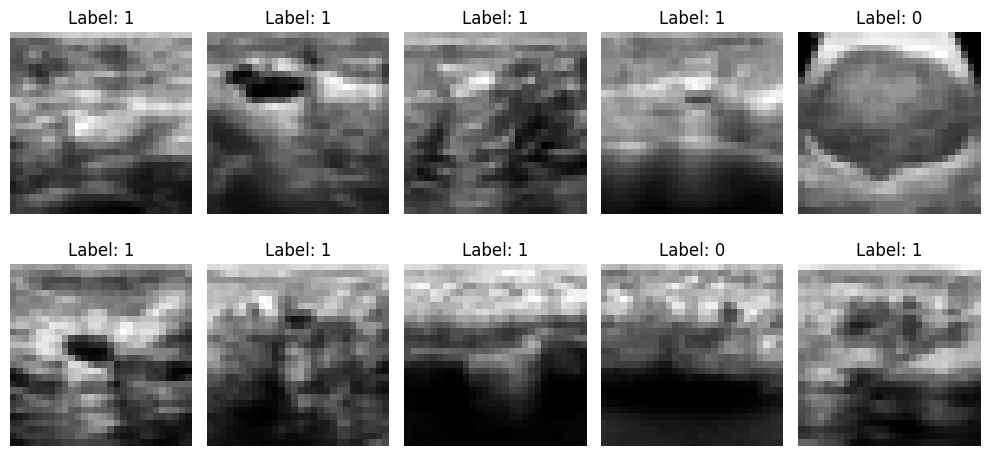

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # 2 satır, 5 sütun
for i in range(10):
    ax = axes[i // 5, i % 5]  # Satır ve sütun indeksini hesapla
    ax.imshow(train_images[i], cmap="gray")  # Görüntüyü çiz
    ax.set_title(f"Label: {train_labels[i]}")  # Başlık olarak etiket ekle
    ax.axis("off")  # Eksenleri kapat

plt.tight_layout()
plt.show()

### Model eğitim sürecine giriyoruz :
- Burada cnn mimarisiyle modelimizi eğitiyoruz eğer bu mimari hakkında bilginiz yok ise **MEDIUM** profilimdeki yazıyı okuyabilirsiniz 

In [6]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def cnn():
    model = models.Sequential()

    # 1. Convolution + MaxPooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    # 2. Convolution + MaxPooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    

    # 3. Convolution + Dropout
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Dropout(0.3))  # Overfitting'i azaltmak için kullandık

    # Flatten + Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())  # Normalizasyon ekledik
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary Classification için sigmoid aktivasyon fonksiyonunu kullanıyoruz
    
    # Model derleme
    model.compile(optimizer=Adam(learning_rate=0.00005), # modelin learning_rate paremetresiyle çeşitli denemeler sonucunda kanatimce en iyisidir
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    return model


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping ekleyelim: bunun sayesinde model overfittingten sakınabilecek ayrıcan gereksiz yere model zamandan kaybetmez zaman tasarrufu sağlar .
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True) # patience bir parameetredir fine tuning çalışmalarımız burada da yapılmıştır.

# Modeli oluşturma
model = cnn()

# Modeli eğitme
history = model.fit(train_images, train_labels, 
                    validation_data=(val_images, val_labels),
                    epochs=100,  # bir diğer model tuning alanı
                    batch_size=32, # bir diğer model tuning alanı
                    callbacks=[early_stopping])

Epoch 1/100


c:\Users\Harun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5352 - loss: 0.7233 - val_accuracy: 0.7949 - val_loss: 0.6819
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5823 - loss: 0.7141 - val_accuracy: 0.8077 - val_loss: 0.6776
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5703 - loss: 0.6881 - val_accuracy: 0.8205 - val_loss: 0.6738
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5981 - loss: 0.6636 - val_accuracy: 0.8333 - val_loss: 0.6707
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6132 - loss: 0.6342 - val_accuracy: 0.8205 - val_loss: 0.6679
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6407 - loss: 0.6384 - val_accuracy: 0.7821 - val_loss: 0.6624
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6123 - loss: 0.6549 - val_accuracy: 0.7692 - val_loss: 0.6596
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6569 - loss: 0.6163 - val_accuracy: 0.7692 - val_l

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)    # test verisi üzerindeki başarımızı ve loss değerimizi getirdik
print(f"Test Accuracy: {test_acc * 100:.2f}%   , Test Loss: {test_loss}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8506 - loss: 0.3387 
Test Accuracy: 84.62%   , Test Loss: 0.351968914270401


### İlk 10 resim için tahmin ve gerçek değerlerini yazdırarak görselleştirme adımımız

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


C:\Users\Harun\AppData\Local\Temp\ipykernel_29712\176222519.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(predictions[i] > 0.5)


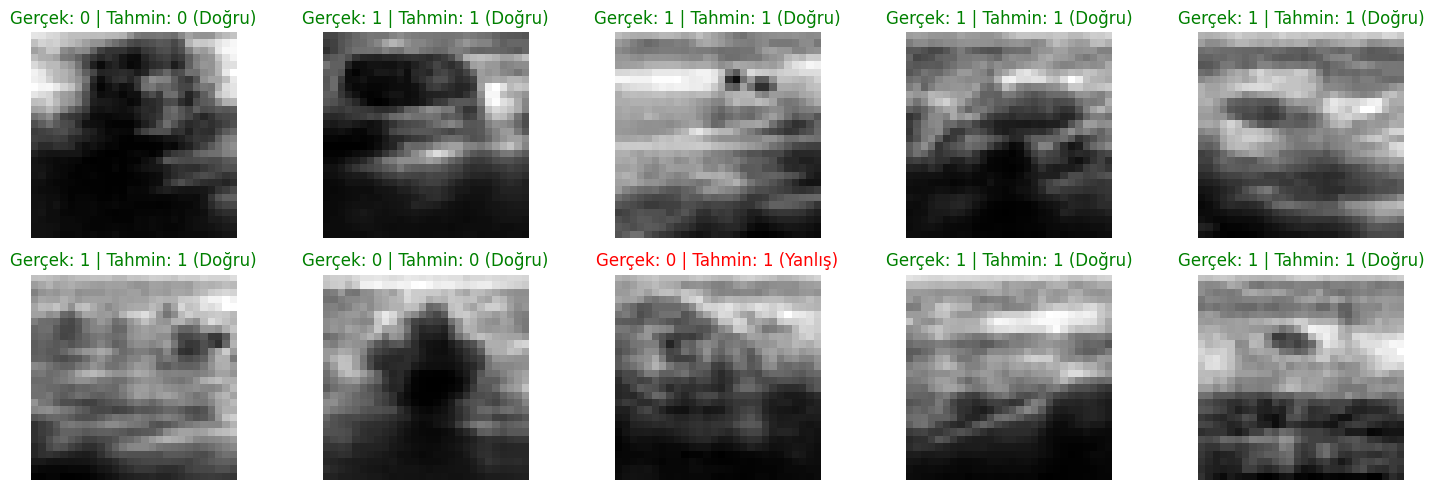

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# İlk 10 tahmin için modelin tahminlerini alıyoruz
predictions = model.predict(test_images[:10])

# Görselleştirme
plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 satır, 5 sütunluk bir grid
    img = test_images[i].numpy().reshape(28, 28)  # EagerTensor'dan NumPy dizisine dönüştürme
    plt.imshow(img, cmap="gray")  # Gri tonlamalı göstermek için
    
    # Gerçek etiket ve tahmini alıyoruz
    true_label = test_labels[i]
    predicted_label = int(predictions[i] > 0.5)

    # Doğru veya yanlış tahmin
    if true_label == predicted_label:
        title_color = 'green'  # Doğru tahmin
        title_text = f"Gerçek: {true_label} | Tahmin: {predicted_label} (Doğru)"
    else:
        title_color = 'red'  # Yanlış tahmin
        title_text = f"Gerçek: {true_label} | Tahmin: {predicted_label} (Yanlış)"
    
    plt.title(title_text, fontsize=12, color=title_color)
    plt.axis('off')  # Eksenleri kaldırma

plt.tight_layout()
plt.show()
